# Machine learning the scikit-learn way

Machine learning is a vast field centered around the analysis of **data**, its **representations** and **predictions** on new examples.

Not all that is machine learning fits into the following categories and not all that is in the following categories is necessarily machine learning, but it definitely helps to have an overview of the major concepts:

## Supervised learning
Given a set of data points $\{(x_i, y_i)\}_i$, find a function, which, given a new example $x$ is capable of predicting $\hat y = f(x)$ as best as possible.

More generally, one can be interested in modeling the probability distribution $p(y|x)$ in order to make correct inferences on new data, e.g. by finding the maximum a posteriori probability $\arg\max_y p(y|x)$

### Classification and Regression
Very often, learning problems are categorized into **classification** and **regression** problems. Classification problems attempt to predict a discrete (categorical) variable from data, whereas the prediction target for regression is generally continuous. The distinction between the two largely arises because there are not many conceivable cases where the two were combined. Another important category is **ranking**, which an order on the data exists, but which is not necessarily homogeneous as in regression.


## Unsupervised learning
Given a set of data points $\{x_i\}_i$ attempt to model **concisely** and **comprehensively** the probability distribution $p(x)$. This can be achieved by **dimensionality reduction techniques** if high-dimensional regularities are known to exist, or similarly **clusterings**, and a host of other methods.

By **concise** we mean that our representation of the data is as simple as possible. By **comprehensive** we mean that all data points are covered by the representation.

**IMPORTANT**: The categorization into supervised and unsupervised by no means yields a complete picture of what machine learning is. Also, sometimes there is a gray area of transition between the two. (E.g. an autoencoder will attempt to repredict a sample from a representation, but this can be seen as a multi-output supervised problem.)


## Inductive Bias
We cannot in general fit *any* function to data, but have to make some sort of assumptions about the class of functions we would like to employ. These assumptions can be e.g. **smoothness** assumptions, such as Lipschitz continuity, assumptions of **piece-wise constancy** or rather strict assumptions of (generalized) linearity. While it is possible to use non-parametric classes of functions, let us use parametric ones for the sake of the argument: Our functional class becomes $\{f_\vartheta|\vartheta\in\Theta\}$ and our data fitting problem becomes
$$\hat f = \arg\max_\vartheta\textrm{[some objective given data and function} f_\vartheta\textrm{]}$$

## Learning from training data
Given a set of training points, one can attempt to find values for $\vartheta$ such that $f_\vartheta$ fits and generalizes well to new data. A common framework for obtaining $\vartheta$ is **empirical risk minimization** by solving an **optimization problem** on a **loss function** $L(\{(f_\vartheta(x_i), y_i)\}_i)$, i.e.

$$\hat f = \arg\min_\vartheta L(\{(f_\vartheta(x_i), y_i)\}_{i\in\textrm{TRAIN}})$$

Depending on the capacity of the model, this optimization may or may not lead to good prediction performance, as quantified by
$$e = \textrm{Err}(\{(\hat f(x_j), y_j)\}_{j\in\textrm{TEST}})$$

### Overfitting and Regularization
If the model learns the predictions on the train data by heart and totally fails on the test data, then our model is likely **overfitting**. This means that the class of functions was too flexible and the inductive bias of the method led to the estimation of a function with little use on the test set.

In this case one can restrict the complexity of the model by regularization. Depending on the type of estimated model, this works differently. It can be an additive penalty to the loss, such as with $\ell_2$ and $\ell_1$ regularization. But let us keep it as general as possible by writing

$$\hat f = \arg\min_\vartheta L(\{(f_\vartheta(x_i), y_i)\}_{i\in\textrm{TRAIN}} \textrm{such that Complexity(}\vartheta\textrm{)}\leq C,$$
where $\textrm{Complexity}(\vartheta)$ is some sort of model complexity measure.

# Some very simple examples

In [8]:
%matplotlib inline


In [24]:
from figures.sgd_separator import plot_sgd_separator
plot_sgd_separator()

In [25]:
from figures.linear_regression import plot_linear_regression
plot_linear_regression()

## Another simple example: The Iris dataset

As an example of a simple dataset, we're going to take a look at the iris data stored by scikit-learn.
The data consists of measurements of three different species of irises.  There are three species of iris
in the dataset, which we can picture here:

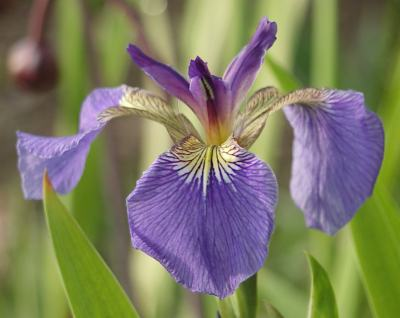

Iris Setosa



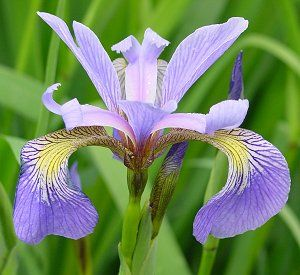

Iris Versicolor



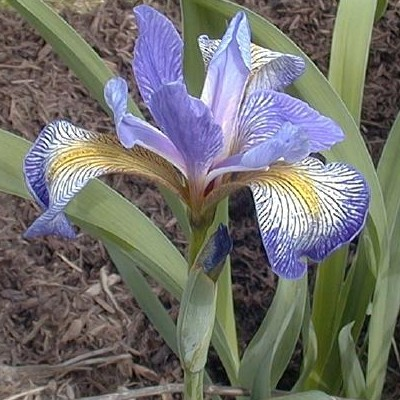

Iris Virginica


In [11]:
from IPython.core.display import Image, display
display(Image(filename='figures/iris_setosa.jpg'))
print("Iris Setosa\n")

display(Image(filename='figures/iris_versicolor.jpg'))
print("Iris Versicolor\n")

display(Image(filename='figures/iris_virginica.jpg'))
print("Iris Virginica")

### Quick question:

**If we want to design an algorithm to recognize iris species, what might the data be?**

Remember: we need a 2D array of size `[n_samples x n_features]`.

- What would the `n_samples` refer to?

- What might the `n_features` refer to?

Remember that there must be a **fixed** number of features for each sample, and feature
number ``i`` must be a similar kind of quantity for each sample.

### Loading the Iris data with scikit-learn
Scikit-learn has a very straightforward set of data on these iris species.  The data consist of
the following:

- Features in the Iris dataset:

  1. sepal length in cm
  2. sepal width in cm
  3. petal length in cm
  4. petal width in cm

- Target classes to predict:

  1. Iris Setosa
  2. Iris Versicolour
  3. Iris Virginica
  
  ``scikit-learn`` embeds a copy of the iris CSV file along with a helper function to load it into numpy arrays:

In [12]:
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
from sklearn.datasets import # tab complete to explore all datasets

The features of each sample flower are stored in the ``data`` attribute of the dataset:

In [14]:
n_samples, n_features = iris.data.shape
print(n_samples)
print(n_features)
print(iris.data[0])

150
4
[ 5.1  3.5  1.4  0.2]


The information about the class of each sample is stored in the ``target`` attribute of the dataset:

In [15]:
print(iris.data.shape)
print(iris.target.shape)

(150, 4)
(150,)


In [16]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


The names of the classes are stored in the last attribute, namely ``target_names``:

In [17]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


These data are four dimensional, but we can visualize two of the dimensions
at a time using a simple scatter-plot. 

In [19]:
%matplotlib inline
from matplotlib import pyplot as plt

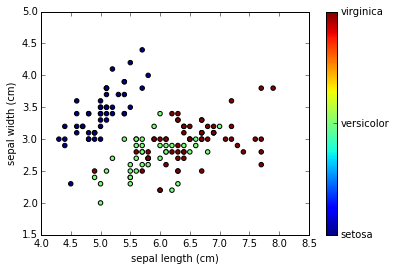

In [23]:
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

**Excercise**: Can you choose x_index and y_index to find a plot where it is easier to seperate the different classes of irises.


# The structure of scikit-learn

Let us discover how the scikit-learn estimators expose their functionality to us.

## Data representation
First of all, we need to know how to pass any data to scikit-learn: It has to be in the right representation. We shall work in the context of supervised learning. For unsupervised learning, simply remove the mention of the target variable $y$.

All scikit-learn estimators work with data **matrices**:

$$X\in\mathbb{R}^{n\times p},$$

where $n = n_\textrm{samples}$ and $p = n_\textrm{features}$

In supervised learning, for a single target, the target vector $y$ is

$$y\in\mathbb{R}^n.$$

For multiple targets, $Y\in\mathbb{R}^{n\times q}$ is a matrix of targets.

## Estimators

All scikit-learn estimators are **Python classes** with the same interface. All of them implement the method **fit** taking a data matrix $X$ and possibly a target $y$.

Supervised methods then also implement a method **predict** in order to predict on new data.

Unsupervised methods implement a method called **transform**, bringing a new data point to the concise representation space.

Please also see Lars Buitinck's article on the principles of the scikit-learn API
https://hal.inria.fr/hal-00856511

# Basic scikit-learn principles in practice
## Exploring scikit-learn with tab-complete

In [26]:
#from sklearn import 

In [27]:
from sklearn import linear_model

In [28]:
#linear_model.

## Exploring estimators

In [29]:
from sklearn.linear_model import LinearRegression

**Estimator parameters**: All the parameters of an estimator can be set when it is instantiated:

In [30]:
model = LinearRegression(normalize=True)
print(model.normalize)

True


In [31]:
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)


### Fitting on data

In [33]:
import numpy as np
x = np.array([0, 1, 2])
y = np.array([0, 1, 2])

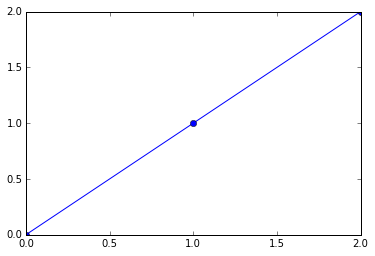

In [34]:
_ = plt.plot(x, y, marker='o')

In [35]:
X = x[:, np.newaxis] # The input data for sklearn is 2D: (samples == 3 x features == 1)
X

array([[0],
       [1],
       [2]])

In [36]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

**Estimated parameters**: When data is fitted with an estimator, parameters are estimated from the data at hand. All the estimated parameters are attributes of the estimator object ending by an underscore:

In [37]:
model.coef_

array([ 1.])

**Classification**: K nearest neighbors (kNN) is one of the simplest learning strategies: given a new, unknown observation, look up in your reference database which ones have the closest features and assign the predominant class.

Let's try it out on our iris classification problem:

In [38]:
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X, y = iris.data, iris.target
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)
# What kind of iris has 3cm x 5cm sepal and 4cm x 2cm petal?
print(iris.target_names[knn.predict([[3, 5, 4, 2]])])

['virginica']


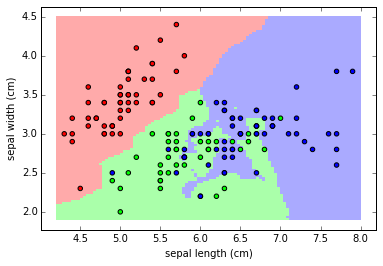

In [39]:
# A plot of the sepal space and the prediction of the KNN
from helpers import plot_iris_knn
plot_iris_knn()

**Regression**: The simplest possible regression setting is the linear regression one:

Model coefficient: 3.93491, and intercept: 1.46229


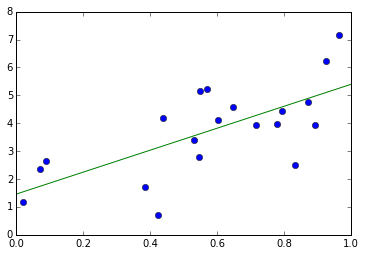

In [40]:
# Create some simple data
import numpy as np
np.random.seed(0)
X = np.random.random(size=(20, 1))
y = 3 * X[:, 0] + 2 + np.random.normal(size=20)

# Fit a linear regression to it
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X, y)
print("Model coefficient: %.5f, and intercept: %.5f"
      % (model.coef_, model.intercept_))

# Plot the data and the model prediction
X_test = np.linspace(0, 1, 100)[:, np.newaxis]
y_test = model.predict(X_test)
import pylab as pl
plt.plot(X[:, 0], y, 'o')
plt.plot(X_test[:, 0], y_test)

## A recap on scikit-learn's estimator interface

Scikit-learn strives to have a uniform interface across all methods,
and we’ll see examples of these below. Given a scikit-learn *estimator*
object named `model`, the following methods are available:

- Available in **all Estimators**
  + `model.fit()` : fit training data. For supervised learning applications,
    this accepts two arguments: the data `X` and the labels `y` (e.g. `model.fit(X, y)`).
    For unsupervised learning applications, this accepts only a single argument,
    the data `X` (e.g. `model.fit(X)`).
- Available in **supervised estimators**
  + `model.predict()` : given a trained model, predict the label of a new set of data.
    This method accepts one argument, the new data `X_new` (e.g. `model.predict(X_new)`),
    and returns the learned label for each object in the array.
  + `model.predict_proba()` : For classification problems, some estimators also provide
    this method, which returns the probability that a new observation has each categorical label.
    In this case, the label with the highest probability is returned by `model.predict()`.
  + `model.score()` : for classification or regression problems, most (all?) estimators implement
    a score method.  Scores are between 0 and 1, with a larger score indicating a better fit.
- Available in **unsupervised estimators**
  + `model.transform()` : given an unsupervised model, transform new data into the new basis.
    This also accepts one argument `X_new`, and returns the new representation of the data based
    on the unsupervised model.
  + `model.fit_transform()` : some estimators implement this method,
    which more efficiently performs a fit and a transform on the same input data.

### Regularization in practice

**Train errors** Suppose you are using a 1-nearest neighbor estimator. How many errors do you expect on your train set?

- Train set error is not a good measurement of prediction performance. You need to leave out a test set.
- In general, we should accept errors on the train set.

**An example of regularization** The core idea behind regularization is that we are going to prefer models that are simpler, for a certain definition of ''simpler'', even if they lead to more errors on the train set.

As an example, let's generate with a 9th order polynomial.

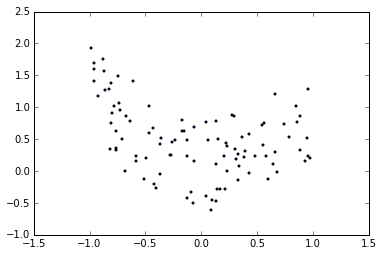

In [41]:
rng = np.random.RandomState(0)
x = 2 * rng.rand(100) - 1

f = lambda t: 1.2 * t ** 2 + .1 * t ** 3 - .4 * t ** 5 - .5 * t ** 9
y = f(x) + .4 * rng.normal(size=100)

plt.figure()
plt.scatter(x, y, s=4)

And now, let's fit a 4th order and a 9th order polynomial to the data. For this we need to engineer features: the n_th powers of x:

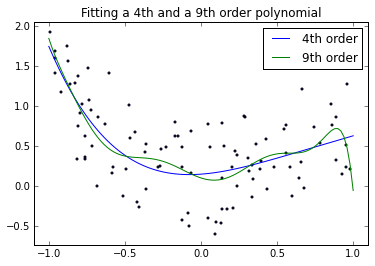

In [42]:
x_test = np.linspace(-1, 1, 100)

plt.figure()
plt.scatter(x, y, s=4)

X = np.array([x**i for i in range(5)]).T
X_test = np.array([x_test**i for i in range(5)]).T
order4 = LinearRegression()
order4.fit(X, y)
plt.plot(x_test, order4.predict(X_test), label='4th order')

X = np.array([x**i for i in range(10)]).T
X_test = np.array([x_test**i for i in range(10)]).T
order9 = LinearRegression()
order9.fit(X, y)
plt.plot(x_test, order9.predict(X_test), label='9th order')

plt.legend(loc='best')
plt.axis('tight')
plt.title('Fitting a 4th and a 9th order polynomial')

With your naked eyes, which model do you prefer, the 4th order one, or the 9th order one?

Let's look at the ground truth:

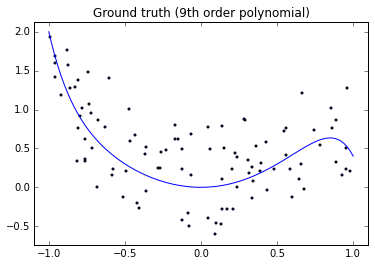

In [43]:
plt.figure()
plt.scatter(x, y, s=4)
plt.plot(x_test, f(x_test), label="truth")
plt.axis('tight')
plt.title('Ground truth (9th order polynomial)')

Regularization is ubiquitous in machine learning. Most scikit-learn estimators have a parameter to tune the amount of regularization. For instance, with k-NN, it is 'k', the number of nearest neighbors used to make the decision. k=1 amounts to no regularization: 0 error on the training set, whereas large k will push toward smoother decision boundaries in the feature space.

### Exercise: Interactive Demo on linearly separable data

Run the **svm_gui.py** file in the repository